# Image Masking with OpenCV
* 이미지처리에서 가장 많이 사용하는 연산은 비트연산(Bitwiase arithmetics)
* 대상이 되는 오브젝트에서 관심영역(Region of Interest)을 도형으로 Mask해서 추출하는 이미지 처리 기술
* 다른 이미지 마스킹 응용 프로그램은 알파 블렌딩 및 투명도


### 이미지 다운로드 

In [1]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-masking/opencv-masking.zip
!unzip -qq opencv-masking.zip
%cd opencv-masking

--2021-04-22 05:45:19--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-masking/opencv-masking.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.233.225
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.233.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 338523 (331K) [application/zip]
Saving to: ‘opencv-masking.zip’

opencv-masking.zip  100%[===================>] 330.59K  1.32MB/s    in 0.2s    

2021-04-22 05:45:20 (1.32 MB/s) - ‘opencv-masking.zip’ saved [338523/338523]

/content/opencv-masking


## 코드 기술 및 수행

### 패키지 임포트

In [2]:
# import the necessary packages
from matplotlib import pyplot as plt
import numpy as np
import cv2
import argparse

### Function to display images in Jupyter Notebooks and Google Colab

In [3]:
def plt_imshow(title, image):
  """
  전달받은 이미지를 BGR프레임에서 RGB프레임으로 변환 후 화면에서 표출
  """
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.title(title)
  plt.imshow(image)
  plt.grid(False);plt.show()

### OpenCV를 이용한 이미지 연산
* Image Cropping부분 참조

In [4]:
# 파이썬 스크립트를 터미널에서 수행시 사용
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", type=str, default="grand_canyon.png",
# 	help="path to the input image")
# args = vars(ap.parse_args())

# 쥬피터 혹은 코랩에서 사용시 
args = {
	"image": "adrian.png"
}

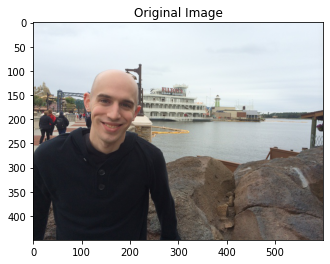

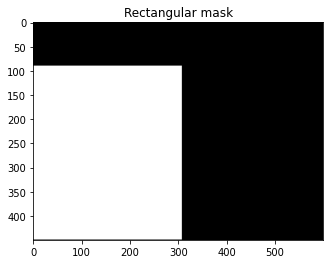

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

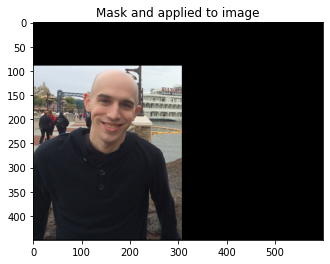

In [7]:
# 1.이미지 로드 
image = cv2.imread(args['image'])
plt_imshow("Original Image", image)

# 2.위의 이미지와 동일한 width, height, channel로 ndarray배열 초기화
mask = np.zeros(image.shape[:2], dtype='uint8') # 원래 이미지와 동일한 너비와 높이로 0으로 채운 넘파일 배열 생성

# 캔버스의 왼쪽 모서리영역에서 사람 이미지 부분까지 직사각형 
# 255는 흰색, 0은 검정색
# pt1 : (width, height), pt2 : (width, height), 색깔 :255(흰색) , -1 : 색깔채움
cv2.rectangle(mask,(0, 90), (307, 448), 255, -1)   
plt_imshow("Rectangular mask", mask)
display(mask)
# apply our mask -- notice how only the person in the image is
# cropped out
# 처음 두 매개 변수는 영상 자체 (즉, 비트 연산을 적용하려는 이미지)
masked = cv2.bitwise_and(image, image, mask = mask)
plt_imshow("Mask and applied to image", masked)

In [8]:
help(cv2.bitwise_and)

Help on built-in function bitwise_and:

bitwise_and(...)
    bitwise_and(src1, src2[, dst[, mask]]) -> dst
    .   @brief computes bitwise conjunction of the two arrays (dst = src1 & src2)
    .   Calculates the per-element bit-wise conjunction of two arrays or an
    .   array and a scalar.
    .   
    .   The function cv::bitwise_and calculates the per-element bit-wise logical conjunction for:
    .   *   Two arrays when src1 and src2 have the same size:
    .       \f[\texttt{dst} (I) =  \texttt{src1} (I)  \wedge \texttt{src2} (I) \quad \texttt{if mask} (I) \ne0\f]
    .   *   An array and a scalar when src2 is constructed from Scalar or has
    .       the same number of elements as `src1.channels()`:
    .       \f[\texttt{dst} (I) =  \texttt{src1} (I)  \wedge \texttt{src2} \quad \texttt{if mask} (I) \ne0\f]
    .   *   A scalar and an array when src1 is constructed from Scalar or has
    .       the same number of elements as `src2.channels()`:
    .       \f[\texttt{dst} (I) = 

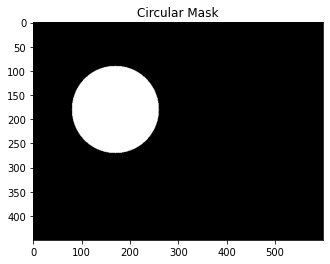

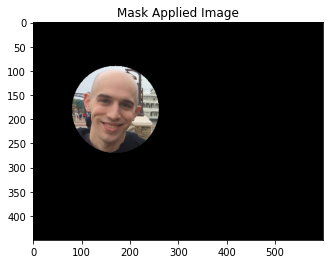

In [13]:
# 반지름이 100인 원을 얼굴 주위에 그리기
# 마스크 적용
mask = np.zeros(image.shape[:2], dtype='uint8') # 이미지의 크기만큼 ndarray초기화
cv2.circle(mask, (170, 180), 90, 255, -1)  
masked = cv2.bitwise_and(image, image, mask = mask)

# 마스크가 적용된 이미지
plt_imshow("Circular Mask", mask)
#display(masked, masked.shape, type(masked))
plt_imshow("Mask Applied Image", masked)

### 정리
* mask의 핵심은 우리가 관심있는 이미지의 영역에 집중할수 있다는 것.
이 의미는 곧, 머신러닝, 딥러닝에서 이미지 분류 및 물체 감지와 같은 주제를 연구할때 큰 영향을 미친다.
* 분류를 수행시 자연상태의 무궁화꽃을 찍게되는데 꽃의 이미지만 필요한 경우에 mask를 통해 정량화 및 분류가 가능
